### Project Overview
- You are assigned to retrieve 5 years of data on secirities belinging to the S&P500, Nasdaq, and Russell
- You will Use the ADJ Close and Volume(daily change)  of these companie to try to predict the value of the UVXY 
- Use feature engineering to  try to generate more features for the data set, how do these features coorelate to UVXY
- Does these valuse have any predictive abilities on UVXY?
- Keep in mind you will be working with alot of companies and features so consider a method to reduce these features, may be attempt a PCA and see how the results will pan out

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

## importing Tickers 
- WE will import all tickers from Nasdaq, S&P, and Russell as of 2020

In [2]:
sandp = pd.read_csv("resources/companies.csv")

In [3]:
len(sandp["Symbol"])

505

In [4]:
russell = pd.read_excel("resources/Russle_2000_2020.xlsx")

In [5]:
russell_tickers = list(russell["Ticker"])

In [6]:
len(russell_tickers)

1999

In [7]:
russell_zip = dict(zip(russell["Ticker"], russell["Name"]))

In [8]:
nasdaq = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [9]:
nasdaq_tickers = nasdaq["Ticker"]

In [10]:
len(nasdaq_tickers)

103

In [11]:
nasdaq_zipp = dict(zip(nasdaq["Ticker"], nasdaq["Name"]))

## Zipping
- We will zip the ticker and the company's name together if we need to query the company's name at some point

In [12]:
sandpZip = dict(zip(sandp["Symbol"], sandp["Name"]))

## Getting Stock Data for Each ticker 
- We will begin with the adj Close

### Saving
- because this is a taxing task to gather a little over 4000 companies Adj Close over a 5 year period 
- once we have done it we will save the data frame to a csv file for future reference
- WE do not want to have to fetchingthe data every time
- We will then import the data below

In [26]:
df = pd.read_csv("resources/securityData.csv", index_col="Date")

In [29]:
len(df.columns)

2321

### Fetching Penny Stocks from the data
- These will be stocks under 3 dollars for our consideration

In [41]:
recent_date = df.index.max()

In [42]:
df_sorted = pd.DataFrame(df.loc[recent_date].sort_values())

In [43]:
df_sorted.columns = ["price"]

In [44]:
stocks_under_3 = df_sorted[df_sorted["price"] < 3].transpose()

In [45]:
stocks_under_3

,SCG,YGYI,TEUM,GEN,CFMS,ASRT,PTN,SONM,AVCO,USWS,...,WTI,CASI,NINE,DS,MRKR,PIRS,ABEO,GORO,CRBP,AT
price,0.045,0.4,0.59,1.02,1.12,1.14,1.15,1.18,1.41,1.47,...,2.88,2.89,2.89,2.9,2.93,2.94,2.96,2.96,2.99,2.99


In [46]:
###stocks_under_3.to_csv("resources/stocks_under_3_2_12_2020.csv")

In [48]:
len(stocks_under_3.columns)

55

### Fetchinng data
- BEst way to use this data is to track momentum for the last 30 days
- We will optimize a portfolio using the data for all of these companies for the last 30 days
- Then will find the highert weighted 10 companies and create a portfolio with just those

In [70]:
working_frame = df[stocks_under_3.columns].loc["2020-12-31":]

In [71]:
len(working_frame)

30

## Checking for missing data

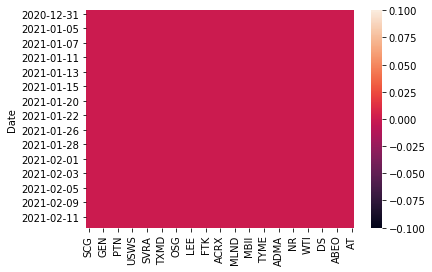

In [76]:
sns.heatmap(working_frame.isnull())

### Checking Coorelation

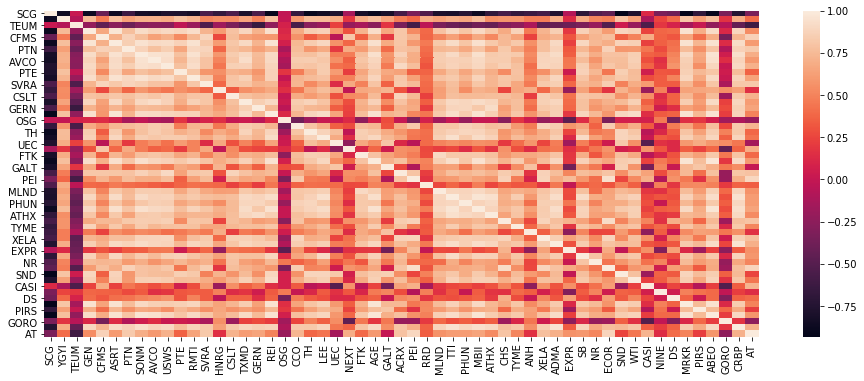

In [78]:
plt.figure(figsize=(16,6))
sns.heatmap(working_frame.corr())

### Getting the returns for the portfolio 

In [79]:
working_frame_returns = working_frame.pct_change()

In [81]:
working_frame_returns

,SCG,YGYI,TEUM,GEN,CFMS,ASRT,PTN,SONM,AVCO,USWS,...,WTI,CASI,NINE,DS,MRKR,PIRS,ABEO,GORO,CRBP,AT
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.0,-0.023973,0.033898,0.041667,0.004545,0.222222,0.000000,0.023481,0.000000,-0.048781,...,0.013825,-0.033898,0.007353,-0.016807,0.013793,0.092000,0.076433,0.137457,0.016000,0.057143
2021-01-05,0.0,0.087719,-0.032787,0.140000,0.131222,0.068182,0.044118,0.035088,0.008929,0.153846,...,0.077273,-0.021053,0.036496,0.029915,0.176871,-0.014652,0.029586,-0.054381,0.118110,-0.054054
2021-01-06,0.0,-0.048387,0.016949,-0.035088,0.004000,0.063830,-0.042253,-0.020861,-0.008850,0.000000,...,0.016878,0.007168,0.014085,-0.020747,-0.028902,0.014870,-0.017241,-0.031949,-0.007042,0.033333
2021-01-07,0.0,0.057627,0.016667,0.054545,0.077025,-0.020000,0.044118,0.034621,0.044643,0.022222,...,-0.008299,0.003559,-0.052083,0.033898,0.011905,0.018315,0.040936,-0.019802,0.021277,-0.018433
2021-01-08,0.0,0.076923,-0.016393,0.017241,-0.019729,0.102041,-0.028169,-0.030888,-0.008547,0.065217,...,0.012552,0.028369,-0.010989,-0.053279,0.052941,0.021583,-0.011236,-0.036063,-0.020833,-0.009390
2021-01-11,0.0,-0.010417,0.000000,0.050848,0.047799,0.111111,0.028985,0.035857,0.008621,0.061224,...,0.008264,0.027586,-0.003704,0.038961,0.039106,-0.010563,0.045455,-0.010489,0.035461,0.000000
2021-01-12,0.0,-0.127820,0.033333,0.096774,0.020408,0.016667,0.000000,0.014103,0.000000,0.480769,...,0.057377,0.006711,0.037175,0.033333,0.032258,-0.014235,-0.010870,-0.003534,0.027397,-0.004739
2021-01-13,0.0,-0.120690,-0.016129,0.132353,0.017647,0.098361,0.098592,0.099874,0.008547,-0.038961,...,-0.023256,0.086667,0.010753,-0.004032,0.083333,-0.039711,-0.016484,-0.028369,0.073333,0.004762


### Optimizing this portfolio 

In [103]:
n_portfolios = 2000
all_weights = np.zeros((n_portfolios, len(working_frame.columns)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(working_frame.columns)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(working_frame_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(working_frame_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

### MaX Sharp, Max Returns, Lowest Vol

In [104]:
max_returns = all_returns.argmax()

In [105]:
max_sharp = all_Sharps.argmax()

In [106]:
lowest_vol = all_vol.argmin()

### Plotting this Plot

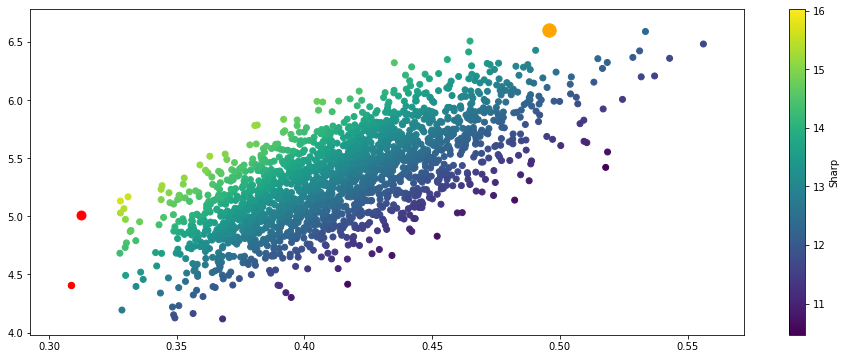

In [107]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[max_sharp], all_returns[max_sharp], c="red", s = 80)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], c="red", s = 40)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c="orange", s = 180)

### Appears There is a portfolio that is returning over 600%
- Also a sharp ratio of 16
- We will find this portfolio 

### lets set up our frontier data frame

In [108]:
front_weights = pd.DataFrame(all_weights, columns=working_frame.columns)

In [109]:
front_return = pd.DataFrame(all_returns, columns=["return"])

In [110]:
front_vol = pd.DataFrame(all_vol, columns=["vol"])

In [111]:
front_shp = pd.DataFrame(all_Sharps, columns=["shp"])

### lets put it all together
- We will merge all of the details together for this portfolio

In [112]:
frontier = pd.concat([front_return, front_shp,front_vol, front_weights], axis=1)

## Sorting by highest return

In [114]:
frontier = frontier.sort_values("return", ascending = False)

In [116]:
frontier.to_csv("resources/penny_analysis/frontier_Data_all.csv")

### Lets look at the top 10 companies in this portfolio by weight 

In [126]:
frontier.drop(["return","shp","vol"], axis=1).iloc[0].sort_values(ascending = False).head(10)

SONM    0.040347
USWS    0.037320
DS      0.037056
GEN     0.035638
WTI     0.035527
ECOR    0.034229
XELA    0.034203
TEUM    0.032940
PHUN    0.032187
EXPR    0.031776
Name: 638, dtype: float64

#### Optimization of  top 10 weighed companies this portfolio

In [127]:
top_10_tickers = frontier.drop(["return","shp","vol"], axis=1).iloc[0].sort_values(ascending = False).head(10).index

In [128]:
top_10_tickers

Index(['SONM', 'USWS', 'DS', 'GEN', 'WTI', 'ECOR', 'XELA', 'TEUM', 'PHUN',
       'EXPR'],
      dtype='object')

In [131]:
top_10_df = working_frame[top_10_tickers]

In [133]:
top_10_df_returns = top_10_df.pct_change()

In [134]:
top_10_df_returns

,SONM,USWS,DS,GEN,WTI,ECOR,XELA,TEUM,PHUN,EXPR
Date,,,,,,,,,,
2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,0.023481,-0.048781,-0.016807,0.041667,0.013825,0.038462,0.114857,0.033898,-0.047619,0.021978
2021-01-05,0.035088,0.153846,0.029915,0.140000,0.077273,0.043210,0.044276,-0.032787,0.075000,0.032258
2021-01-06,-0.020861,0.000000,-0.020747,-0.035088,0.016878,0.000000,-0.021717,0.016949,-0.139535,0.041667
2021-01-07,0.034621,0.022222,0.033898,0.054545,-0.008299,-0.023669,0.072939,0.016667,0.099099,0.020000
2021-01-08,-0.030888,0.065217,-0.053279,0.017241,0.012552,0.024242,0.000985,-0.016393,0.106557,0.019608
2021-01-11,0.035857,0.061224,0.038961,0.050848,0.008264,-0.035503,0.131890,0.000000,-0.059259,-0.038462
2021-01-12,0.014103,0.480769,0.033333,0.096774,0.057377,0.036810,0.101391,0.033333,0.015748,0.050000
2021-01-13,0.099874,-0.038961,-0.004032,0.132353,-0.023256,-0.005917,0.478920,-0.016129,-0.062015,-0.019048


## Optimizing this portfolio 

In [135]:
n_portfolios = 3000
all_weights = np.zeros((n_portfolios, len(top_10_df.columns)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(top_10_df.columns)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(top_10_df_returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(top_10_df_returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

In [136]:
m_shp = all_Sharps.argmax()

In [137]:
m_ret = all_returns.argmax()

In [138]:
l_vol = all_vol.argmin()

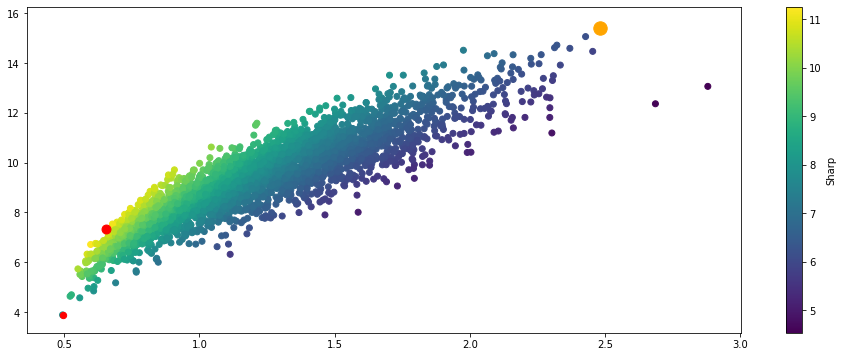

In [139]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[m_shp], all_returns[m_shp], c="red", s = 80)
plt.scatter(all_vol[l_vol], all_returns[l_vol], c="red", s = 40)
plt.scatter(all_vol[m_ret], all_returns[m_ret], c="orange", s = 180)

In [140]:
f_weights = pd.DataFrame(all_weights, columns=top_10_df.columns)

In [142]:
f_ret = pd.DataFrame(all_returns, columns=["return"])

In [143]:
f_vol = pd.DataFrame(all_vol, columns=["vol"])

In [144]:
f_shp = pd.DataFrame(all_Sharps, columns=["shp"])

In [145]:
top_10_Frontier = pd.concat([f_vol,f_ret,f_shp,f_weights], axis=1)

In [149]:
top_10_Frontier.sort_values("return", ascending = False)

,vol,return,shp,SONM,USWS,DS,GEN,WTI,ECOR,XELA,TEUM,PHUN,EXPR
715,2.481460,15.410748,6.210355,0.040100,0.084647,0.036267,0.098966,0.015513,0.038863,0.248415,0.079225,0.128855,0.229149
1157,2.427870,15.067132,6.205905,0.013063,0.112262,0.174450,0.126691,0.007658,0.040661,0.234208,0.013826,0.052533,0.224648
937,2.321663,14.723637,6.341849,0.015125,0.103404,0.088060,0.130236,0.092751,0.052795,0.276688,0.038188,0.018584,0.184169
440,2.313092,14.620232,6.320644,0.201484,0.170705,0.017438,0.031332,0.017117,0.028576,0.129733,0.022037,0.123339,0.258239
2029,2.369700,14.595609,6.159266,0.174993,0.097832,0.067940,0.094050,0.018710,0.049411,0.234244,0.042869,0.004480,0.215470
...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,0.608541,4.846404,7.963971,0.078712,0.053628,0.180275,0.029026,0.187582,0.008476,0.013222,0.219520,0.206994,0.022564
263,0.526480,4.692879,8.913697,0.122947,0.040298,0.071237,0.221635,0.150612,0.067877,0.010093,0.275934,0.016625,0.022742
2809,0.521514,4.633409,8.884540,0.154252,0.001953,0.120918,0.019931,0.136111,0.213935,0.019182,0.181315,0.144204,0.008198
2169,0.557221,4.570959,8.203128,0.077265,0.019018,0.177709,0.219368,0.120867,0.080592,0.005948,0.248258,0.020245,0.030730
